In [2]:
# Conectar con unidad de drive donde esta guardado el csv con los datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Leer el archivo con pandas
file_path = '/content/drive/MyDrive/certificado DS/RETO_DS_AS.csv'
data = pd.read_csv(file_path)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB
None


In [4]:
for column in data.select_dtypes(exclude='int64'):
    unique_values = data[column].unique()
    print(f"Valores distintos de '{column}': {unique_values}")

Valores distintos de 'job': ['self-employed' 'unemployed' 'blue-collar' 'admin.' 'retired' 'services'
 'technician' 'management' 'entrepreneur' 'student' 'housemaid' 'unknown']
Valores distintos de 'marital': ['married' 'single' 'divorced']
Valores distintos de 'education': ['tertiary' 'unknown' 'secondary' 'primary']
Valores distintos de 'default': ['no' 'yes']
Valores distintos de 'housing': ['no' 'yes']
Valores distintos de 'loan': ['no' 'yes']
Valores distintos de 'contact': ['cellular' 'unknown' 'telephone']
Valores distintos de 'month': ['nov' 'sep' 'jul' 'aug' 'may' 'jun' 'jan' 'mar' 'oct' 'apr' 'feb' 'dec']
Valores distintos de 'poutcome': ['success' 'unknown' 'failure' 'other']
Valores distintos de 'y': ['yes' 'no']


In [5]:
'''
variables categoricas

job		    nominal
marital		nominal
education	ordinal, salvo por 'unknown'
default		yes/no
housing		yes/no
loan		  yes/no
contact		nominal
month		  nominal
poutcome	nominal
y		      yes/no
'''
data_encoded = data.copy()

# Codificar la unica variable categorica ordinal
education_order = ['primary', 'secondary', 'tertiary', 'unknown']
data_encoded['education'] = pd.Categorical(data_encoded['education'], categories=education_order, ordered=True)
data_encoded['education_encoded'] = data_encoded['education'].cat.codes
data_encoded.loc[data_encoded['education_encoded'] == 3, 'education_encoded'] = -1 # una forma de tratarlo

print(data_encoded[['education_encoded', 'education']].head(10))
data_encoded.drop('education', axis=1, inplace=True)

   education_encoded  education
0                  2   tertiary
1                 -1    unknown
2                  1  secondary
3                  1  secondary
4                  1  secondary
5                  1  secondary
6                  1  secondary
7                  1  secondary
8                  0    primary
9                  2   tertiary


In [6]:
# Codificar las variables nominales con one-hot encoding de pandas
nominal_columns = ['job', 'marital', 'contact', 'month', 'poutcome']
data_encoded_hot = pd.get_dummies(data_encoded, columns=nominal_columns)
print(data_encoded_hot.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                9000 non-null   int64 
 1   default            9000 non-null   object
 2   balance            9000 non-null   int64 
 3   housing            9000 non-null   object
 4   loan               9000 non-null   object
 5   day                9000 non-null   int64 
 6   duration           9000 non-null   int64 
 7   campaign           9000 non-null   int64 
 8   pdays              9000 non-null   int64 
 9   previous           9000 non-null   int64 
 10  y                  9000 non-null   object
 11  education_encoded  9000 non-null   int8  
 12  job_admin.         9000 non-null   bool  
 13  job_blue-collar    9000 non-null   bool  
 14  job_entrepreneur   9000 non-null   bool  
 15  job_housemaid      9000 non-null   bool  
 16  job_management     9000 non-null   bool  


In [7]:
# Codificar las columnas binarias
data_encoded_bin = data_encoded_hot.copy()
binary_columns = ['default', 'housing', 'loan', 'y']

for column in binary_columns:
  data_encoded_bin[f'{column}_encoded'] = data_encoded_bin[column].replace({'yes': True, 'no': False})
  print(data_encoded_bin[[column, f'{column}_encoded']])
  data_encoded_bin.drop(column, axis=1, inplace=True)

     default  default_encoded
0         no            False
1         no            False
2         no            False
3         no            False
4         no            False
...      ...              ...
8995      no            False
8996      no            False
8997      no            False
8998      no            False
8999      no            False

[9000 rows x 2 columns]
     housing  housing_encoded
0         no            False
1         no            False
2        yes             True
3        yes             True
4         no            False
...      ...              ...
8995     yes             True
8996     yes             True
8997      no            False
8998     yes             True
8999     yes             True

[9000 rows x 2 columns]
     loan  loan_encoded
0      no         False
1      no         False
2      no         False
3      no         False
4      no         False
...   ...           ...
8995  yes          True
8996   no         False
8997   no     

<ipython-input-7-7b62a63ba2e1>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded_bin[f'{column}_encoded'] = data_encoded_bin[column].replace({'yes': True, 'no': False})
<ipython-input-7-7b62a63ba2e1>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded_bin[f'{column}_encoded'] = data_encoded_bin[column].replace({'yes': True, 'no': False})
<ipython-input-7-7b62a63ba2e1>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicit

In [8]:
data_encoded_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                9000 non-null   int64
 1   balance            9000 non-null   int64
 2   day                9000 non-null   int64
 3   duration           9000 non-null   int64
 4   campaign           9000 non-null   int64
 5   pdays              9000 non-null   int64
 6   previous           9000 non-null   int64
 7   education_encoded  9000 non-null   int8 
 8   job_admin.         9000 non-null   bool 
 9   job_blue-collar    9000 non-null   bool 
 10  job_entrepreneur   9000 non-null   bool 
 11  job_housemaid      9000 non-null   bool 
 12  job_management     9000 non-null   bool 
 13  job_retired        9000 non-null   bool 
 14  job_self-employed  9000 non-null   bool 
 15  job_services       9000 non-null   bool 
 16  job_student        9000 non-null   bool 
 17  job_technician

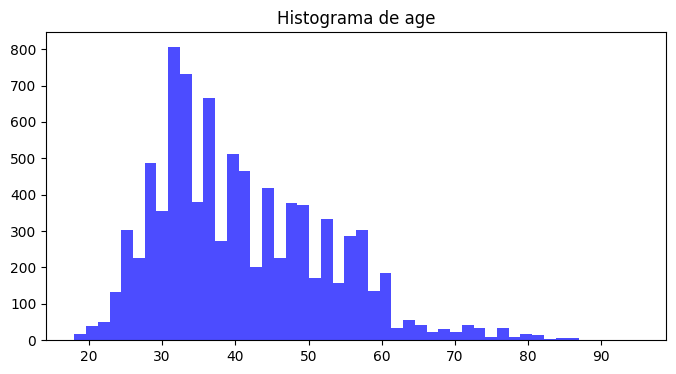

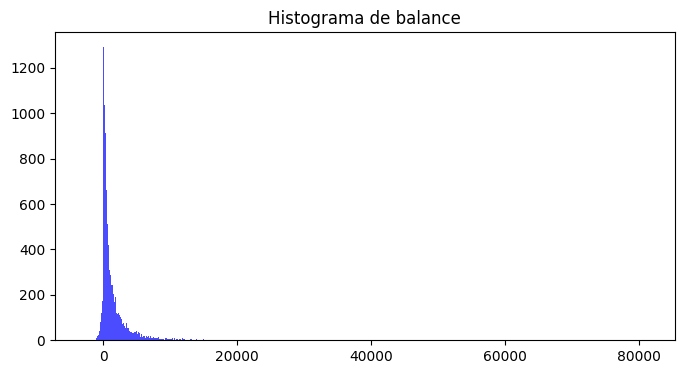

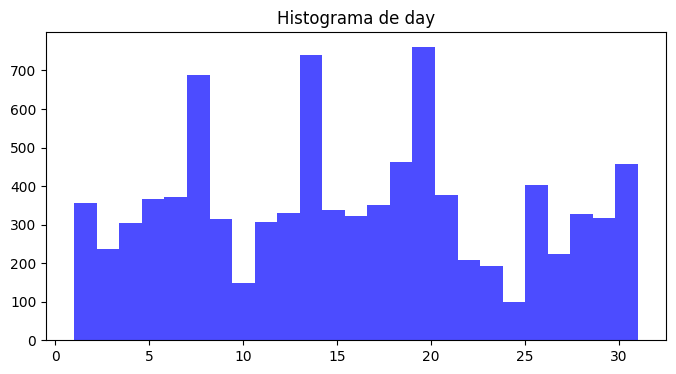

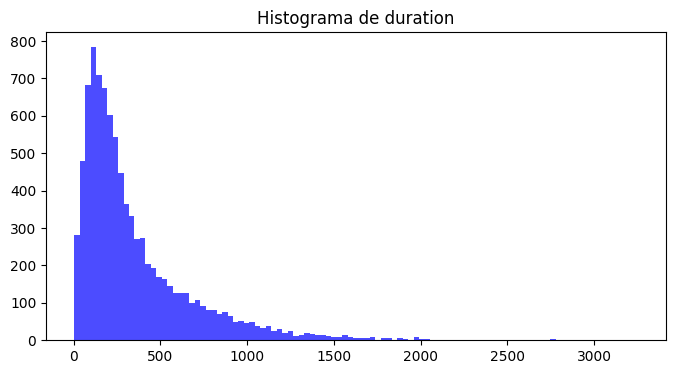

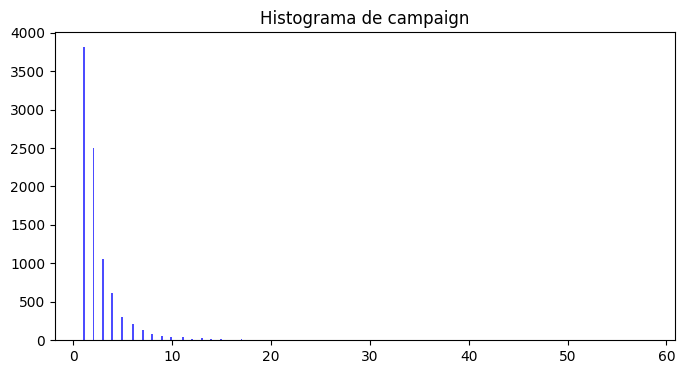

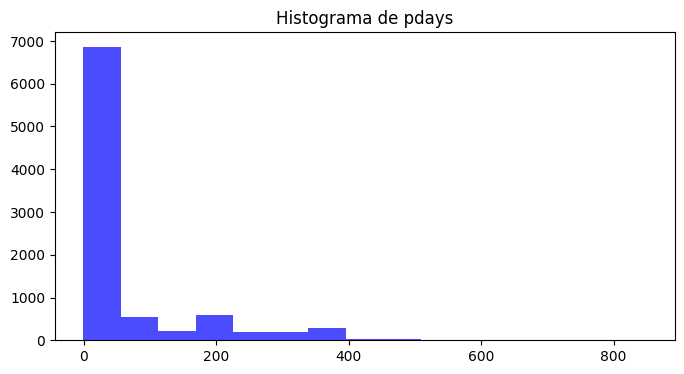

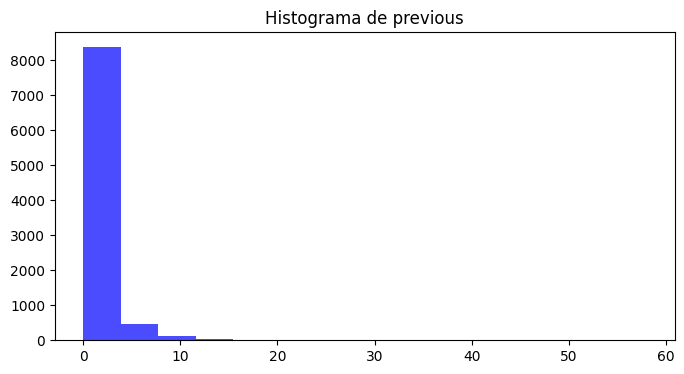

In [9]:
import matplotlib.pyplot as plt

numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for column in numerical_columns:
  plt.figure(figsize=(8, 4))
  plt.hist(data_encoded_bin[column], bins='auto', alpha=0.7, color='blue')
  plt.title(f'Histograma de {column}')
  plt.show()

In [10]:
# Verificar si hay valores negativos antes de normalizar
for column in numerical_columns:
  print(f"smallest value of '{column}': {data_encoded_bin[column].min()}")

smallest value of 'age': 18
smallest value of 'balance': -3058
smallest value of 'day': 1
smallest value of 'duration': 3
smallest value of 'campaign': 1
smallest value of 'pdays': -1
smallest value of 'previous': 0


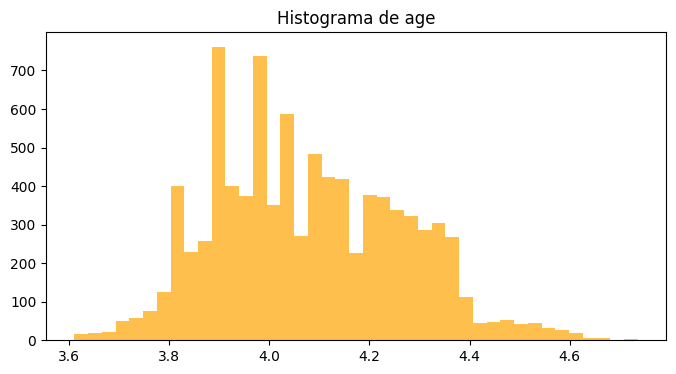

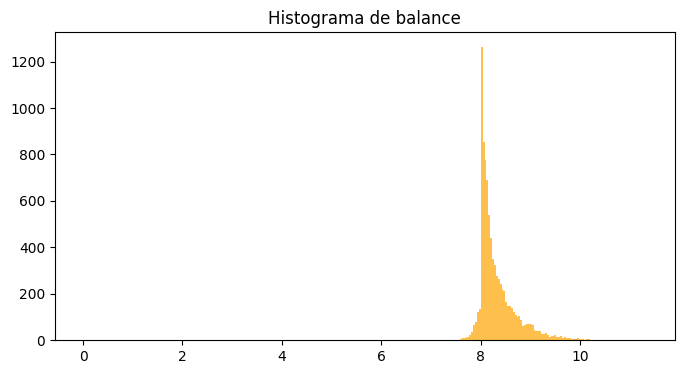

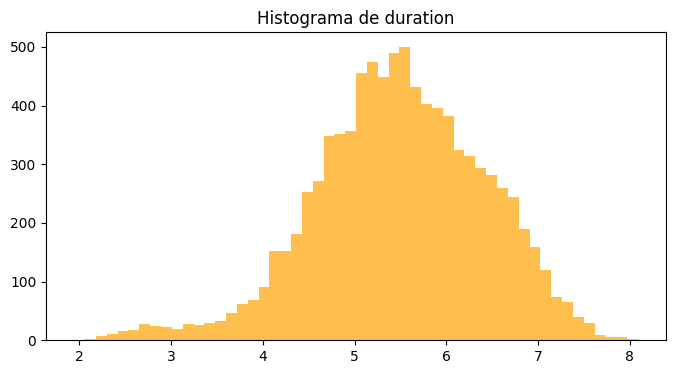

In [11]:
# Normalizar columnas con distruciones de capana sesgadas

import numpy as np

def log_normalize(x):
  return np.log(x + abs(x.min()) + 1)

data_norm = data_encoded_bin.copy()

colums_to_normalize = ['age', 'balance', 'duration']
for column in colums_to_normalize:
  data_norm[column] = log_normalize(data_norm[column])
  plt.figure(figsize=(8, 4))
  plt.hist(data_norm[column], bins='auto', alpha=0.7, color='orange')
  plt.title(f'Histograma de {column}')

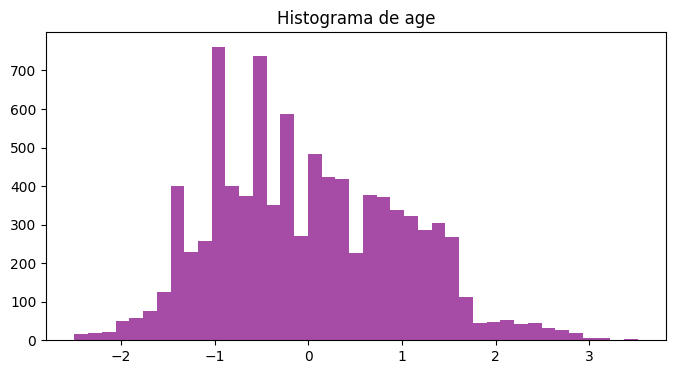

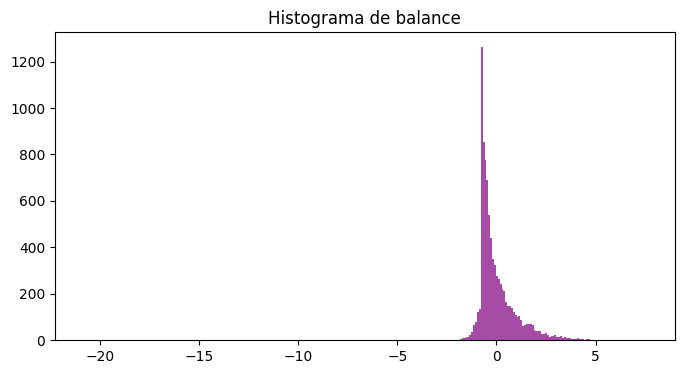

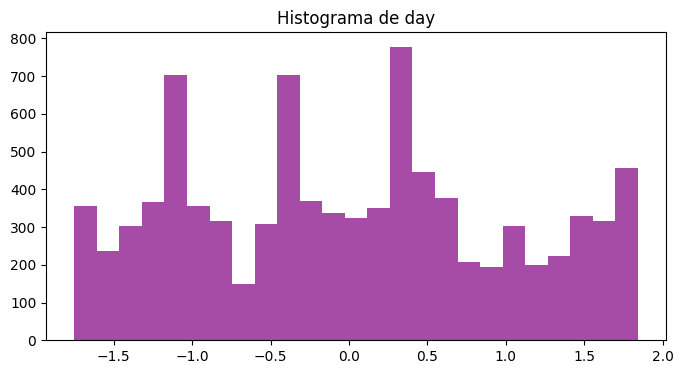

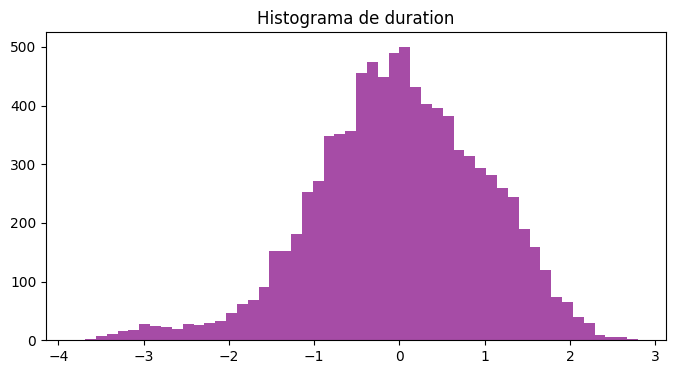

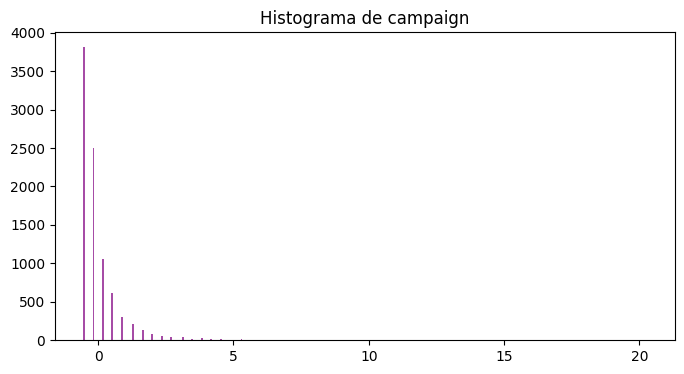

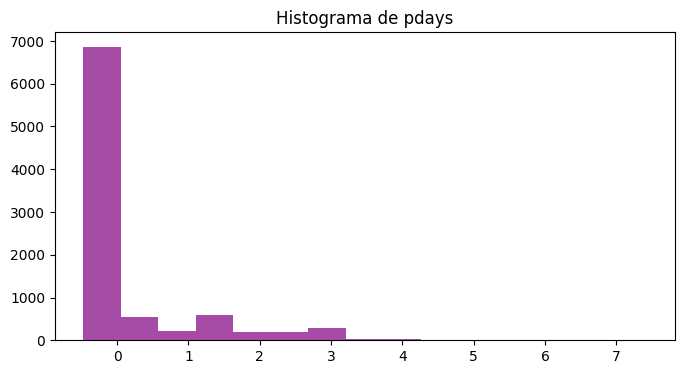

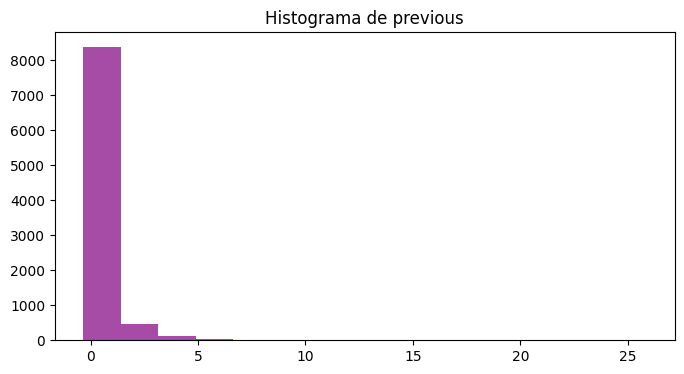

In [12]:
def standarize(x):
  return (x - x.mean()) / x.std()

data_std = data_norm.copy()

for column in numerical_columns:
  data_std[column] = standarize(data_std[column])
  plt.figure(figsize=(8, 4))
  plt.hist(data_std[column], bins='auto', alpha=0.7, color='purple')
  plt.title(f'Histograma de {column}')
  plt.show()

In [13]:
from sklearn.model_selection import train_test_split

# Particiona los datos en los conjuntos de entrenamiento, validación y prueba
# en 60%, 20% y 20%, respectivamente.

TRAIN_PART = 0.60
VALIDATION_PART = 0.20
TEST_PART = 0.20

X = data_std.drop(columns=['y_encoded'])
Y = data_std['y_encoded']
X = X.values
Y = Y.values

x_train_validation, x_test, y_train_validation, y_test = train_test_split(X, Y, test_size=TEST_PART)
x_train, x_validation, y_train, y_validation = train_test_split(x_train_validation, y_train_validation, test_size=VALIDATION_PART/(VALIDATION_PART+TRAIN_PART))

In [14]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1.0, solver='newton-cg')
model_RL = clf.fit(x_train, y_train)

print("Exactitud del 1er ajuste con regresión logistica: ")
print(model_RL.score(x_validation, y_validation))

Exactitud del 1er ajuste con regresión logistica: 
0.8222222222222222


In [15]:
from sklearn.metrics import confusion_matrix

print("Matriz de confusion del 1er ajuste:")
pr = model_RL.predict(x_validation)
confusion_matrix(y_validation, pr)

Matriz de confusion del 1er ajuste:


array([[870, 163],
       [157, 610]])

In [16]:
# Buscar mejores parametros con grid search

from sklearn.model_selection import GridSearchCV

parameters = {
  'C': [0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 0.7, 1, 10, 100, 1000],
  'penalty': ('l1', 'l2', 'elasticnet', 'none'),
  'solver': ('newton-cg', 'saga', 'lbfgs', 'sag')
}

RL_grid = LogisticRegression(max_iter=10000)
modelo_RL_grid = GridSearchCV(RL_grid, parameters)
modelo_RL_grid.fit(x_train, np.ravel(y_train))

print(modelo_RL_grid)
print(f"Los mejores valores encontrados son {modelo_RL_grid.best_params_}")
print(f"Con un score de {modelo_RL_grid.best_score_}")
print(modelo_RL_grid.score(x_test, y_test))

'''
Los mejores valores encontrados son {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Con un score de 0.8224074074074075
0.8361111111111111 <- resultado de los mejores parametros con conjunto de pruebas
'''

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
605 fits failed out of a total of 880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 0.7, 1, 10, 100,
                               1000],
                         'penalty': ('l1', 'l2', 'elasticnet', 'none'),
                         'solver': ('newton-cg', 'saga', 'lbfgs', 'sag')})
Los mejores valores encontrados son {'C': 0.2, 'penalty': 'l1', 'solver': 'saga'}
Con un score de 0.8253703703703703
0.8322222222222222


"\nLos mejores valores encontrados son {'C': 1, 'penalty': 'l1', 'solver': 'saga'}\nCon un score de 0.8224074074074075\n0.8361111111111111 <- resultado de los mejores parametros con conjunto de pruebas\n"

In [17]:
# Buscar mejores parametros a mano

clf = LogisticRegression(C=0.2, penalty='l2', solver='newton-cg')
model_RL2 = clf.fit(x_train, y_train)

print("Exactitud del ajuste con regresión logistica (parametros buscados a mano): ")
print(model_RL2.score(x_validation, y_validation))

# Es mas preciso por ~una milesima que el que regreso grid search?
# esta combinacion no la dio grid search ?

print("\nMatriz de confusion:")
pr = model_RL2.predict(x_validation)
confusion_matrix(y_validation, pr)

# Clasifica ~3~ instancias mas correctamente con respecto al 1er ajuste

# Mejor regresion logistica
#   solver='newton-cg'
#   penalty='l2'
#   C=0.2

Exactitud del ajuste con regresión logistica (parametros buscados a mano): 
0.8216666666666667

Matriz de confusion:


array([[870, 163],
       [158, 609]])

In [18]:
from sklearn.neural_network import MLPRegressor

best_a = -1
best_score = -1

for a in np.arange(0, 1, 0.05):
  clf = MLPRegressor(hidden_layer_sizes=(10,4), max_iter=3000, alpha=a, random_state=42)
  model_NNR = clf.fit(x_train, y_train)

  score = model_NNR.score(x_validation, y_validation)
  print(f"Exactitud del ajuste con red neuronal a={a}:")
  print(score)

  if score > best_score:
    best_score = score
    best_a = a

Exactitud del ajuste con red neuronal a=0.0:
0.49857750348359153
Exactitud del ajuste con red neuronal a=0.05:
0.5074540156478677
Exactitud del ajuste con red neuronal a=0.1:
0.5122277715150181
Exactitud del ajuste con red neuronal a=0.15000000000000002:
0.5212546594333933
Exactitud del ajuste con red neuronal a=0.2:
0.5143367816668862
Exactitud del ajuste con red neuronal a=0.25:
0.5170502835912429
Exactitud del ajuste con red neuronal a=0.30000000000000004:
0.5148217751032163
Exactitud del ajuste con red neuronal a=0.35000000000000003:
0.5101060356080129
Exactitud del ajuste con red neuronal a=0.4:
0.5087921839438609
Exactitud del ajuste con red neuronal a=0.45:
0.5104206484207927
Exactitud del ajuste con red neuronal a=0.5:
0.5118583946794213
Exactitud del ajuste con red neuronal a=0.55:
0.5114388448997049
Exactitud del ajuste con red neuronal a=0.6000000000000001:
0.5116945208368391
Exactitud del ajuste con red neuronal a=0.65:
0.5116928434014991
Exactitud del ajuste con red neuron

In [20]:
neuron_count = [i for i in range(1, 50, 5)] + [i for i in range(50, 100, 10)]
print(neuron_count)

for count in neuron_count:
  clf = MLPRegressor(hidden_layer_sizes=(count, count), max_iter=3000, alpha=best_a, random_state=42)
  model_NNR = clf.fit(x_train, y_train)

  score = model_NNR.score(x_validation, y_validation)
  print(f"Exactitud del ajuste con dos capas de {count} neuronas:")
  print(score)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 50, 60, 70, 80, 90]
Exactitud del ajuste con dos capas de 1 neuronas:
-0.00010626365461319232
Exactitud del ajuste con dos capas de 6 neuronas:
0.5149217176986398
Exactitud del ajuste con dos capas de 11 neuronas:
0.4968984064687282
Exactitud del ajuste con dos capas de 16 neuronas:
0.5296270868876156
Exactitud del ajuste con dos capas de 21 neuronas:
0.5276927016571903
Exactitud del ajuste con dos capas de 26 neuronas:
0.5263308528483235
Exactitud del ajuste con dos capas de 31 neuronas:
0.5052793287454859
Exactitud del ajuste con dos capas de 36 neuronas:
0.5251656278969135
Exactitud del ajuste con dos capas de 41 neuronas:
0.48929450022887544
Exactitud del ajuste con dos capas de 46 neuronas:
0.5043049766198469
Exactitud del ajuste con dos capas de 50 neuronas:
0.48278146044789927
Exactitud del ajuste con dos capas de 60 neuronas:
0.5026865989906293
Exactitud del ajuste con dos capas de 70 neuronas:
0.4691125387097067
Exactitud del ajuste con d

In [22]:
for count in neuron_count:
  clf = MLPRegressor(hidden_layer_sizes=(count, count, count), max_iter=3000, alpha=best_a, random_state=42)
  model_NNR = clf.fit(x_train, y_train)

  score = model_NNR.score(x_validation, y_validation)
  print(f"Exactitud del ajuste con tres capas de {count} neuronas:")
  print(score)

Exactitud del ajuste con tres capas de 1 neuronas:
-9.505848747881629e-05
Exactitud del ajuste con tres capas de 6 neuronas:
0.5103419868495271
Exactitud del ajuste con tres capas de 11 neuronas:
0.522372582092957
Exactitud del ajuste con tres capas de 16 neuronas:
0.5058905535264377
Exactitud del ajuste con tres capas de 21 neuronas:
0.517333637328679
Exactitud del ajuste con tres capas de 26 neuronas:
0.5017763571831474
Exactitud del ajuste con tres capas de 31 neuronas:
0.43513291500653795
Exactitud del ajuste con tres capas de 36 neuronas:
0.43339228173316846
Exactitud del ajuste con tres capas de 41 neuronas:
0.41728394189749063
Exactitud del ajuste con tres capas de 46 neuronas:
0.44538803775874136
Exactitud del ajuste con tres capas de 50 neuronas:
0.46773369362690176
Exactitud del ajuste con tres capas de 60 neuronas:
0.4370721049109305
Exactitud del ajuste con tres capas de 70 neuronas:
0.38916816736909166
Exactitud del ajuste con tres capas de 80 neuronas:
0.4213763186415349


In [42]:
clf = MLPRegressor(hidden_layer_sizes=(46, 46), max_iter=5000, alpha=best_a, random_state=42)
model_NNR = clf.fit(x_train, y_train)

score = model_NNR.score(x_validation, y_validation)
print(f"Exactitud del ajuste:")
print(score)

Exactitud del ajuste:
0.5043049766198469


In [45]:
clf = MLPRegressor(hidden_layer_sizes=(16, 16), max_iter=3000, alpha=best_a, random_state=42)
model_NNR = clf.fit(x_train, y_train)

score = model_NNR.score(x_validation, y_validation)
print(f"Exactitud del ajuste:")
print(score)

print("\nMatriz de confusion:")
pr = model_RL2.predict(x_validation)
confusion_matrix(y_validation, pr)

# Mejor red neuronal:
#   2 capas de 16 neuronas
#   alpha = 0.15

Exactitud del ajuste:
0.5296270868876156

Matriz de confusion:


array([[870, 163],
       [158, 609]])

In [60]:
# Mejor modelo encontrado:

print("Exactitud del ajuste con regresión logistica (mejores parametros y conjunto de pruebas):")
print(model_RL2.score(x_test, y_test))

# Es mas preciso por ~una milesima que el que regreso grid search?
# esta combinacion no la dio grid search ?

print("\nMatriz de confusion:")
pr = model_RL2.predict(x_test)
confusion_matrix(y_test, pr)

Exactitud del ajuste con regresión logistica (mejores parametros y conjunto de pruebas):
0.8277777777777777

Matriz de confusion:


array([[892, 138],
       [172, 598]])

In [59]:
# Extra:

from sklearn.tree import DecisionTreeClassifier

for depth in range(1, 10):
  print(f"Scores for depth={depth}")
  tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
  tree.fit(x_train, y_train)
  print(tree.score(x_validation, y_validation))
  print(tree.score(x_test, y_test))

# Llega a ser tan bueno como la RL. Ensemble method?

Scores for depth=1
0.715
0.7144444444444444
Scores for depth=2
0.7338888888888889
0.7216666666666667
Scores for depth=3
0.775
0.7888888888888889
Scores for depth=4
0.7766666666666666
0.79
Scores for depth=5
0.8088888888888889
0.8194444444444444
Scores for depth=6
0.8122222222222222
0.8172222222222222
Scores for depth=7
0.8116666666666666
0.8283333333333334
Scores for depth=8
0.8077777777777778
0.8166666666666667
Scores for depth=9
0.8116666666666666
0.8194444444444444
